In [1]:
# -*- coding: utf-8 -*-
"""EDA MiBici.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1GlEczc1xrR4VW9-VFL7xajgSIArtXpIh

## Downloading dataset and making basic preparations to handle data
"""

import pandas as pd
import base64


def create_onedrive_directdownload(onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/','_').replace('+','-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl


mibici_dataset_direct_url = create_onedrive_directdownload('https://1drv.ms/u/s!AllbB8dY7-XlonYbKR5K_UxVhb5N?e=2dyg0K')

date_cols = ['Inicio_del_viaje', 'Fin_del_viaje']

df = pd.read_csv(
    mibici_dataset_direct_url,
    dtype={
        'Anio_de_nacimiento': pd.UInt16Dtype(),
        'Origen_Id': pd.UInt16Dtype(),
        'Destino_Id': pd.UInt16Dtype(),
        'Usuario_Id': pd.UInt32Dtype(),
        'Viaje_Id': pd.UInt32Dtype()
    },
    parse_dates=date_cols,
    date_parser=pd.to_datetime
)




In [ ]:
#Eliminar lineas completamente vacías --------
df_unique= df.drop_duplicates(subset=None, keep='first', inplace=False)
df_noempty = df_unique.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False)
print(df_noempty.shape)

In [ ]:
#Usuarios unicos
#df_uniqueuser = df_noempty.drop_duplicates['Usuario_Id'](keep = 'first') 
df_uniqueuser = df_noempty.drop_duplicates(subset=['Usuario_Id'])
df_uniqueuser

,Viaje_Id,Usuario_Id,Genero,Anio_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id
0,6758170,29,M,1992,2018-07-03 18:00:55,2018-07-03 18:22:54,225,62
20,6953484,53,M,1980,2018-07-21 13:31:17,2018-07-21 13:41:07,162,52
34,6868459,60,M,1991,2018-07-13 16:07:02,2018-07-13 16:28:11,197,210
45,6906860,61,M,1992,2018-07-17 15:15:53,2018-07-17 15:21:08,40,64
51,7024369,62,M,1980,2018-07-27 23:05:07,2018-07-27 23:14:19,79,53
...,...,...,...,...,...,...,...,...
8014464,8135473,47699,NaN,<NA>,2018-10-28 13:09:45,2018-10-28 13:18:12,46,46
8014663,8135695,47700,NaN,<NA>,2018-10-28 13:29:46,2018-10-28 14:06:35,66,50
8014761,8135808,47702,NaN,<NA>,2018-10-28 13:42:22,2018-10-28 14:06:17,66,50
8022401,8145462,47731,NaN,<NA>,2018-10-29 13:21:53,2018-10-29 13:41:21,54,64


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 6 Text major ticklabel objects>)

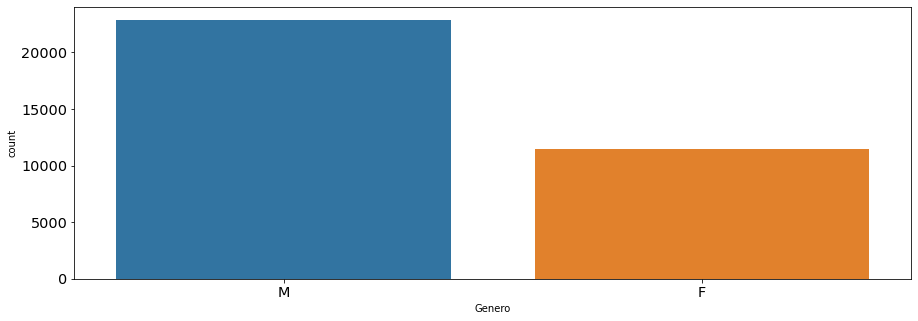

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
sns.countplot(x="Genero", data=df_uniqueuser, order = df_uniqueuser['Genero'].value_counts().index)

plt.xticks(
    fontweight='light',
    fontsize='x-large'  
)

plt.yticks(
    fontweight='light',
    fontsize='x-large'
)

sns.scatterplot(x='Anio_de_nacimiento', y='Usuario_Id', data=df_uniqueuser)

In [ ]:
#Edad
#df_uniqueuser = df_noempty.drop_duplicates['Usuario_Id'](keep = 'first') 
df_uniqueyear = df_noempty.drop_duplicates(subset=['Anio_de_nacimiento'])
df_uniqueyear

,Viaje_Id,Usuario_Id,Genero,Anio_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id
0,6758170,29,M,1992,2018-07-03 18:00:55,2018-07-03 18:22:54,225,62
20,6953484,53,M,1980,2018-07-21 13:31:17,2018-07-21 13:41:07,162,52
34,6868459,60,M,1991,2018-07-13 16:07:02,2018-07-13 16:28:11,197,210
52,7027172,63,M,1984,2018-07-28 12:44:17,2018-07-28 12:51:21,72,15
54,6752357,65,M,1975,2018-07-03 10:06:46,2018-07-03 10:16:25,191,206
...,...,...,...,...,...,...,...,...
554032,13738583,61141,M,2003,2019-11-10 12:03:56,2019-11-10 12:28:43,56,197
580134,13672414,63919,M,1920,2019-11-06 09:42:49,2019-11-06 10:02:53,263,165
1227421,10332712,52995,F,1922,2019-04-01 20:05:25,2019-04-01 20:05:49,159,159
2759717,6409063,39788,F,1924,2018-01-06 07:29:00,2018-01-06 07:33:00,106,115


Text(0, 0.5, 'Cantidad de Usuarios')

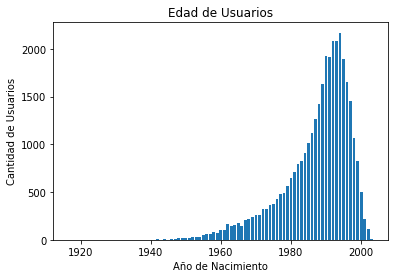

In [ ]:
# create a figure and axis 
fig, ax = plt.subplots() 

# count the occurrence of each class 
data = df_uniqueuser['Anio_de_nacimiento'].value_counts() 

# get x and y data 
points = data.index 
frequency = data.values 

# create bar chart 
ax.bar(points, frequency) 

# set title and labels 
ax.set_title('Edad de Usuarios') 
ax.set_xlabel('Año de Nacimiento') 
ax.set_ylabel('Cantidad de Usuarios')

In [ ]:
df_noempty['Inicio_del_viaje'] = df['Inicio_del_viaje'].dt.to_period('M')
df_noempty

,Viaje_Id,Usuario_Id,Genero,Anio_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id
0,6758170,29,M,1992,2018-07,2018-07-03 18:22:54,225,62
1,6770537,29,M,1992,2018-07,2018-07-04 17:26:57,225,87
2,6772919,29,M,1992,2018-07,2018-07-04 19:30:12,32,62
3,6773989,29,M,1992,2018-07,2018-07-04 20:41:39,62,64
4,6774543,29,M,1992,2018-07,2018-07-04 21:34:10,64,62
...,...,...,...,...,...,...,...,...
8056494,8185641,36163,M,1984,2018-10,2018-11-01 00:12:12,60,180
8056495,8185642,10127,F,1994,2018-10,2018-11-01 00:25:26,53,53
8056496,8185643,28924,M,1999,2018-10,2018-11-01 00:10:16,79,177
8056497,8185644,14448,M,1993,2018-10,2018-11-01 00:17:28,207,25


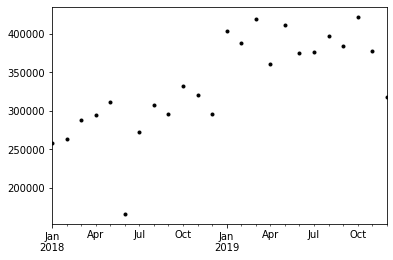

In [ ]:

from pandas import read_csv
from matplotlib import pyplot
# create a figure and axis 
fig, ax = plt.subplots() 

# count the occurrence of each class 
data = df_noempty['Inicio_del_viaje'].value_counts() 

data.plot(style='k.')
pyplot.show()